In [2]:
import numpy as np
from sympy import symbols, Eq, solve
import sympy as sp
from functools import cache

## Linearen Gleichungssysteme

### Apotheker Beispiel

Ein Apotheker hat 36% und 21% Alkohol. Welche Mengen muss er mischen, um 5 Liter 30% Alkohol zu erhalten?

I x1 + x2 = 5

II 0.36x1 + 0.21x2 = 1.5

In [51]:
A = np.array([
    [1, 1],
    [0.36, 0.2]
])

b = np.array([
    [5],
    [1.5]
]
)

x = np.linalg.solve(A, b)
print(x)

### Lösung: x1 = 3.125, x2 = 1.875

[[3.125]
 [1.875]]


### Reaktionsgleichungen auflösen
$$
\text{C} +  \text{Fe}_2\text{O}_3 \rightarrow \text{Fe} + \text{CO}_2
$$

#### (1) Variablen einführen:
$$
a*\text{C} +  b*\text{Fe}_2\text{O}_3 \rightarrow c*\text{Fe} + d*\text{CO}_2
$$

#### (2) LGS aufstellen:

I   a = d

II  2b = c

III 3b = 2d


In [52]:
a, b, c, d = symbols('a b c d')

# Lineare Gleichungen aufstellen:
eq1 = Eq(a - d, 0)
eq2 = Eq(2*b - c, 0)
eq3 = Eq(3*b - 2*d, 0)

# erste Lösung:
lsg1 = solve([eq1, eq2, eq3], (a, b, d))
print("Lösung in Abhängigkeit von c:", lsg1)

# Now you can substitute c with a value like 4
lsg2 = {c: 4}
lsg2 = {var: lsg1[var].subs(lsg2) for var in lsg1}
print("Lösung für c = 4:", lsg2)

Lösung in Abhängigkeit von c: {a: 3*c/4, b: c/2, d: 3*c/4}
Lösung für c = 4: {a: 3, b: 2, d: 3}


## Chemische Reaktionen im Mehrspeziessystem

### Kern und Abbild

In [53]:
A = sp.Matrix([[1, 2], [3, 6]])
A

Matrix([
[1, 2],
[3, 6]])

In [54]:

kern = A.nullspace()[0]
print("Der Kern (Nullraum) der Matrix ist:")
kern


Der Kern (Nullraum) der Matrix ist:


Matrix([
[-2],
[ 1]])

In [55]:
bild = A.columnspace()[0]

print("Der Spaltenraum (Bild) der Matrix ist:")
bild

Der Spaltenraum (Bild) der Matrix ist:


Matrix([
[1],
[3]])

### Beispiel
$$
    (\text{Na}_2\text{O}, \text{Cr}\text{Cl}_3, \text{Na}\text{O}\text{H}, \text{Na}\text{Cl}, \text{H}_2\text{O}, \text{Na}_2\text{Cr}\text{O}_4, \text{Cl}_2), (H, O, Cr, Cl)
$$


In [56]:
# Formelmatrix A:

A = sp.Matrix(
    [[0, 0, 1, 0, 2, 0, 0],
     [1, 0, 1, 0, 1, 4, 0],
     [2, 0, 1, 1, 0, 2, 0],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 3, 0, 1, 0, 0, 2]]
)
A

Matrix([
[0, 0, 1, 0, 2, 0, 0],
[1, 0, 1, 0, 1, 4, 0],
[2, 0, 1, 1, 0, 2, 0],
[0, 1, 0, 0, 0, 1, 0],
[0, 3, 0, 1, 0, 0, 2]])

In [57]:
# Gauß-Verfahren und A^:

A_rref = sp.Matrix(
    [[1, 0, 0, 0, 0, 4, -1],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 0, 1, 0, 0, 0, 2],
     [0, 0, 0, 1, 0, -6, 0],
     [0, 0, 0, 0, 1, 3/2, 0]]
)
A_rref
A_hut = A_rref[:, [5, 6]] * -1

A_hut


Matrix([
[  -4,  1],
[  -1,  0],
[   0, -2],
[   6,  0],
[-1.5,  0]])

In [58]:
# Stöchiometrische Matrix Y:

Y = A_hut.row_insert(A_hut.rows, sp.Matrix.eye(A_hut.cols))
Y

Matrix([
[  -4,  1],
[  -1,  0],
[   0, -2],
[   6,  0],
[-1.5,  0],
[   1,  0],
[   0,  1]])

Reaktionen: 

$$
     17\text{Na}\text{Cl} + 2\text{Na}_2\text{Cr}\text{O}_4 \rightarrow\ 8\text{Na}_2\text{O} + 2\text{Cr}\text{Cl}_3 + 3\text{Cl}_2
$$

$$
     \text{Na}_2\text{O} + \text{H}_2\text{O} \rightarrow\ 2\text{Na}\text{O}\text{H}
$$

## Dynamische Modelle - Diskrete Modelle

### Baktieren Beispiel

In [7]:
x0 = 1

@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        return rekursion(n - 1) * 2

def explizit(n: int) -> float:
    return 2**n * x0

print("Rekursion:", rekursion(72))
print("Explizit:", explizit(72))

Rekursion: 4722366482869645213696
Explizit: 4722366482869645213696


### Baktieren Beispiel mit beschränkten Ressourcen

In [15]:
def wachstumsrate(x: float, k: int, r: float) -> float:
    return r * (1 - x/k)


@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        xn = rekursion(n - 1)
        r = wachstumsrate(xn, 10**6, 3)
        return xn * r
    
print("Rekursion:", rekursion(100))

x = [x for x in np.linspace(0, 72, 100)]
y = [rekursion(xn) for xn in x]

Rekursion: 642672.6260170431


Rekursion: 642672.6260170431


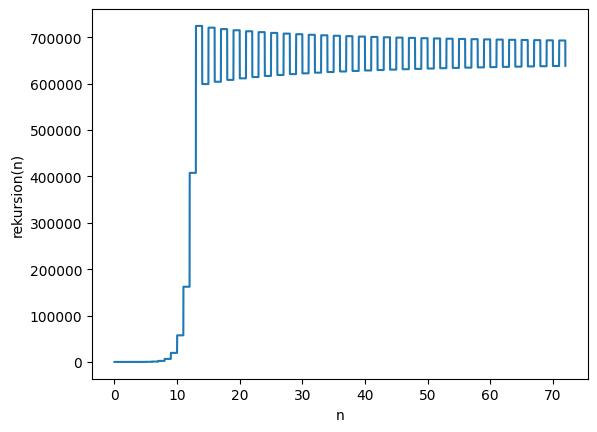

In [23]:
def wachstumsrate(x: float, k: int, r: float) -> float:
    return r * (1 - x / k)

def rekursion_iterative(n: int, x0: float) -> float:
    xn = x0
    for i in range(1, n + 1):
        r = wachstumsrate(xn, 10**6, 3)
        xn = xn * r
    return xn

x0 = 1

result = rekursion_iterative(100, x0)
print("Rekursion:", result)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 72, 10000)
y = [rekursion_iterative(int(xn), x0) for xn in x]

plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('rekursion(n)')
plt.show()
